In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-05/jobs_gender.csv",
                sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

df = df[df['year']=='2016']

df_clean = df[['major_category', 'total_earnings_male', 'total_earnings_female',
               'total_earnings', 'total_workers', 'workers_male', 'workers_female']]

df_clean.total_earnings_male = pd.to_numeric(df_clean.total_earnings_male)
df_clean.total_earnings_female = pd.to_numeric(df_clean.total_earnings_female)
df_clean.total_earnings = pd.to_numeric(df_clean.total_earnings)
df_clean.total_workers = pd.to_numeric(df_clean.total_workers)
df_clean.workers_male = pd.to_numeric(df_clean.workers_male)
df_clean.workers_female = pd.to_numeric(df_clean.workers_female)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
df_clean['male_diff'] = (((df_clean['total_earnings_male'] / df_clean['total_earnings']) - 1) * df_clean['workers_male'] ) / df_clean['total_workers']
df_clean['female_diff'] = (((df_clean['total_earnings_female'] / df_clean['total_earnings']) - 1) * df_clean['workers_female'] ) / df_clean['total_workers']

df_final = df_clean[['major_category', 'total_earnings', 'male_diff', 'female_diff']]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df_final.dtypes

major_category     object
total_earnings      int64
male_diff         float64
female_diff       float64
dtype: object

<Figure size 1440x1080 with 0 Axes>

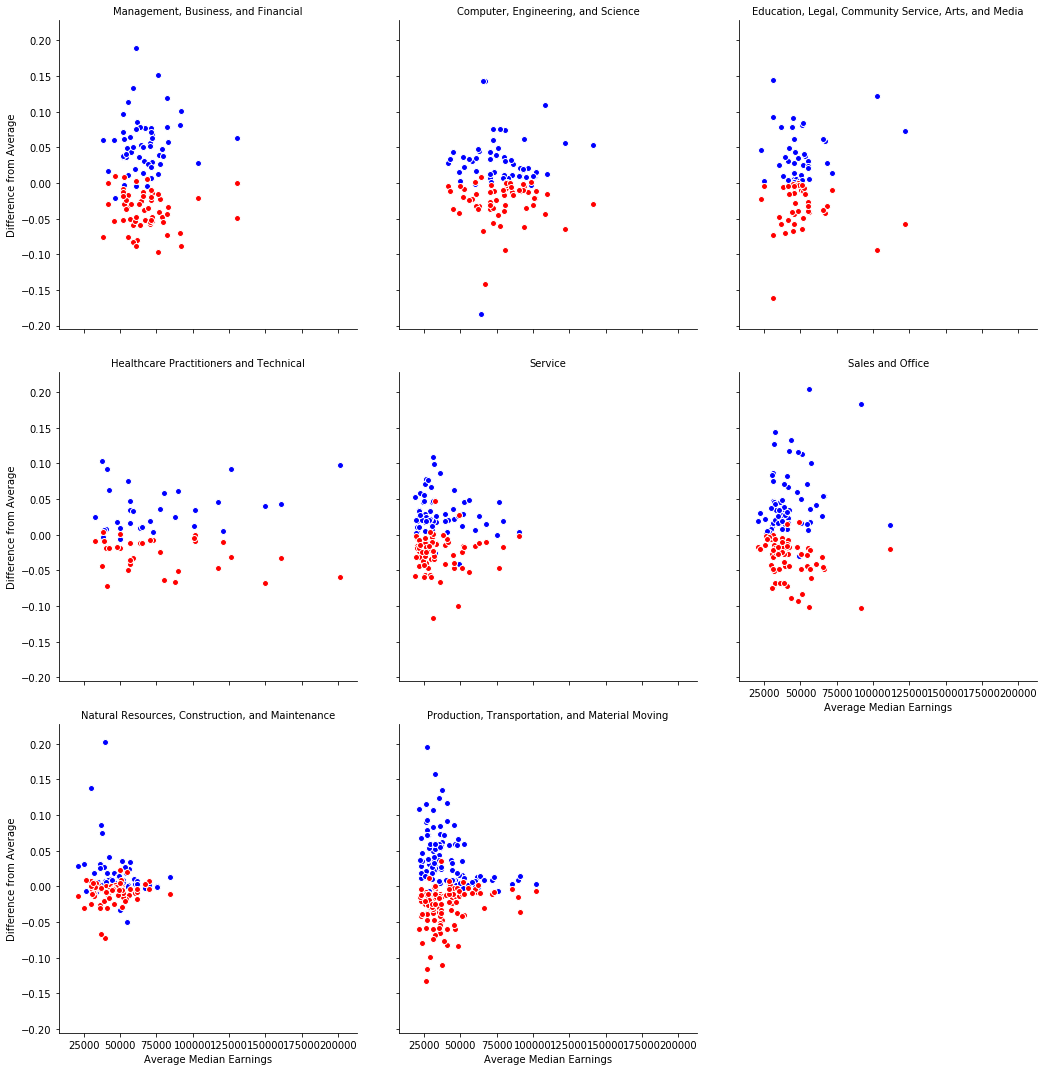

In [7]:
plt.figure(figsize=(20,15))

g = sns.FacetGrid(df_clean, col='major_category', col_wrap=3, height=5)
g = g.map(plt.scatter, 'total_earnings', 'male_diff', color='blue', edgecolor='white')
g = g.map(plt.scatter, 'total_earnings', 'female_diff', color='red', edgecolor='white') .set_titles("{col_name}").set_xlabels("Average Median Earnings").set_ylabels("Difference from Average") 